<a href="https://colab.research.google.com/github/agenorrneto/chikv_recife/blob/main/chikungunya_recife.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Geospatial distribution of chikungunya cases in the municipality of Recife, Pernambuco, Brazil
This notebook describes the analysis of chikungunya cases in the municipality of Recife, Pernambuco, Brazil. My aim was to  build a classified choropleth map that describes the distribution of chikungunya cases in the municipalities' neighborhoods from February to September 2021. Besides, I also used precipitation data to analyse the behaivoir of the epidemic we had this year in the city. Cases data was retrieved from [here](http://dados.recife.pe.gov.br/) and precipitation data from [here](https://portal.inmet.gov.br/).



In [1]:
!pip install geopandas

In [2]:
!pip install mapclassify

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import mapclassify

In [4]:
url = "http://dados.recife.pe.gov.br/dataset/2a9b1c39-0700-4ddf-9a10-b3c8d5d9396c/resource/8cf585ae-71de-40e9-b122-a9806a289d1e/download/chikon2021_recife.csv"

chik_recife = pd.read_csv(url, sep=";")

In [5]:
chik_recife

,nu_notificacao,tp_notificacao,co_cid,dt_notificacao,ds_semana_notificacao,notificacao_ano,co_uf_notificacao,co_municipio_notificacao,id_regional,co_unidade_notificacao,dt_diagnostico_sintoma,ds_semana_sintoma,dt_nascimento,nu_idade,tp_sexo,tp_gestante,tp_raca_cor,tp_escolaridade,co_uf_residencia,co_municipio_residencia,co_regional_residencia,co_distrito_residencia,co_bairro_residencia,no_bairro_residencia,co_logradouro_residencia,nome_logradouro_residencia,nu_cep_residencia,tp_zona_residencia,co_pais_residencia,dt_investigacao,co_cbo_ocupacao,febre,mialgia,cefaleia,exantema,vomito,nausea,dor_costas,conjutivite,artrite,...,dt_encerramento,alrm_hipot,alrm_plaq,alrm_vom,alrm_sang,alrm_hemat,alrm_abdom,alrm_letar,alrm_hepat,alrm_liq,dt_alrm,grav_pulso,grav_conv,grav_ench,grav_insuf,grav_taqui,grav_extre,grav_hipot,grav_hemat,grav_melen,grav_metro,grav_sang,grav_ast,grav_mioc,grav_consc,grav_orgao,dt_grav,mami_hemor,epistaxe,gengivo,metro,petequias,hematura,sangram,laco_n,plasmatico,evidencia,plaq_menor,con_fhd,complica
0,3729821,2,A92.0,2021-01-03,202101,2021,26,261160,1497,6508960,2021-01-03,202101,2021-01-03,2001,F,6.0,9.0,10.0,26.0,261160,1497,119.0,49.0,ALTO DO MANDU,NaN,RUA PARAISO DO LESTE,NaN,1.0,1,2021-01-21,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2021-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3716011,2,A92.0,2021-01-11,202102,2021,26,261160,1497,22187,2021-01-06,202101,1998-10-02,4022,F,1.0,1.0,5.0,26.0,261160,1497,117.0,10.0,SANTO AMARO,NaN,RUA RAIO DE SOL,NaN,1.0,1,2021-01-13,999992,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,...,2021-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3730931,2,A92.0,2021-01-11,202102,2021,26,261160,1497,6726852,2021-01-06,202101,1967-07-15,4053,F,9.0,9.0,9.0,26.0,261160,1497,547.0,23.0,IBURA,NaN,RUA CAMPOS DOS RIOS,NaN,1.0,1,2021-01-11,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2021-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3730947,2,A92.0,2021-01-11,202102,2021,26,261160,1497,671,2021-01-08,202101,1987-09-21,4033,M,6.0,4.0,9.0,26.0,261160,1497,547.0,23.0,IBURA,NaN,RUA RIO XINGU,NaN,1.0,1,2021-01-11,NaN,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2021-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3724141,2,A92.0,2021-01-11,202102,2021,26,261160,1497,604,2021-01-08,202101,1955-09-02,4065,F,9.0,4.0,9.0,26.0,261160,1497,118.0,38.0,LINHA DO TIRO,NaN,RUA AR┬O BOTHER/RUA CANDABLI,NaN,1.0,1,2021-01-11,NaN,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2021-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,3986993,2,A92.0,2021-10-05,202140,2021,26,261160,1497,2711974,2021-09-28,202139,1997-09-05,4024,M,6.0,4.0,NaN,26.0,261160,1497,NaN,NaN,JIQUI┴,NaN,RUA BRA┌NAS,NaN,1.0,1,2021-10-05,NaN,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2021-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15031,3986992,2,A92.0,2021-10-05,202140,2021,26,261160,1497,2711974,2021-09-29,202139,1964-05-12,4057,F,6.0,4.0,9.0,26.0,261160,1497,NaN,86.0,JARDIM SAO PAULO,NaN,RUA LORENA,NaN,1.0,1,2021-10-05,NaN,2.0,2.0,1.0,2.0,2.0

In [6]:
chik_recife.co_cid.unique()

array(['A92.0'], dtype=object)

In [7]:
chik_recife.co_municipio_notificacao.value_counts() #Maior parte das notificações no município do Recife

261160    14933
260790       34
355030       19
260960       16
260345        8
260290        5
261070        3
260760        3
260720        3
261220        1
261190        1
270430        1
240710        1
261640        1
260090        1
280350        1
260120        1
260640        1
260800        1
260890        1
Name: co_municipio_notificacao, dtype: int64

Use only data regarding to Recife

In [8]:
chik_recife = chik_recife[chik_recife['co_municipio_notificacao'] == 261160]

In [9]:
len(chik_recife.no_bairro_residencia.unique())

109

Many neighborhoods names are not the way they should be. Besides, there is some of them which are not from the city.

In [10]:
chik_recife.no_bairro_residencia.unique()

array(['ALTO DO MANDU', 'SANTO AMARO', 'IBURA', 'LINHA DO TIRO', 'JORDAO',
       'ARRUDA', 'CURADO', 'COHAB', 'COQUEIRAL', 'MORRO DA CONCEICAO',
       'NOVA DESCOBERTA', 'BEBERIBE', 'APIPUCOS', 'MUSTARDINHA',
       'CASA AMARELA', 'TAMARINEIRA', 'ILHA JOANA BEZERRA', 'FUNDAO',
       'DOIS IRMAOS', 'BOA VIAGEM', 'JARDIM SAO PAULO', 'VARZEA',
       'PASSARINHO', 'VASCO DA GAMA', 'JIQUIA', 'AFOGADOS', 'AREIAS',
       'IMBIRIBEIRA', 'SITIO DOS PINTOS', 'CAMPO GRANDE', 'IPUTINGA',
       'CORDEIRO', 'PINA', 'AGUA FRIA', 'BRASILIA TEIMOSA',
       'BREJO DA GUABIRABA', 'ILHA DO LEITE', 'IPSEP', 'DOIS UNIDOS',
       'BREJO DE BEBERIBE', 'ALTO SANTA TEREZINHA', 'ALTO JOSE BONIFACIO',
       'ALTO JOSE DO PINHO', 'COELHOS', 'BOMBA DO HEMETERIO',
       'PORTO DA MADEIRA', 'TORROES', 'ENGENHO DO MEIO', 'TEJIPIO',
       'CAJUEIRO', 'ESPINHEIRO', 'CAMPINA DO BARRETO', 'BONGI', 'CAXANGA',
       'PRADO', 'PONTO DE PARADA', 'ESTANCIA', 'BARRO', 'CASA FORTE',
       'CORREGO DO JENIPAPO', 'SA

Here, I use a standard table from the city hall to check the official neighborhoods names

In [11]:
bairros = pd.read_csv("bairro.csv", sep=';')

In [12]:
bairros

,Bairro,rpa
0,Aflitos,3
1,Afogados,5
2,Agua Fria,2
3,Alto Do Mandu,3
4,Alto Jose Bonifacio,3
...,...,...
89,Torroes,4
90,Toto,5
91,Varzea,4
92,Vasco Da Gama,3


In [13]:
def upper_cell(item):
  return item.upper()

In [14]:
bairros['Bairro'] = bairros['Bairro'].map(upper_cell)

In [15]:
bairros

,Bairro,rpa
0,AFLITOS,3
1,AFOGADOS,5
2,AGUA FRIA,2
3,ALTO DO MANDU,3
4,ALTO JOSE BONIFACIO,3
...,...,...
89,TORROES,4
90,TOTO,5
91,VARZEA,4
92,VASCO DA GAMA,3


In [16]:
bairros.Bairro.unique()

array(['AFLITOS', 'AFOGADOS', 'AGUA FRIA', 'ALTO DO MANDU',
       'ALTO JOSE BONIFACIO', 'ALTO JOSE DO PINHO',
       'ALTO SANTA TEREZINHA', 'APIPUCOS', 'AREIAS', 'ARRUDA', 'BARRO',
       'BEBERIBE', 'BOA VIAGEM', 'BOA VISTA', 'BOMBA DO HEMETERIO',
       'BONGI', 'BRASILIA TEIMOSA', 'BREJO DA GUABIRABA',
       'BREJO DE BEBERIBE', 'CABANGA', 'CACOTE', 'CAJUEIRO',
       'CAMPINA DO BARRETO', 'CAMPO GRANDE', 'CASA AMARELA', 'CASA FORTE',
       'CAXANGA', 'CIDADE UNIVERSITARIA', 'COELHOS', 'COHAB', 'COQUEIRAL',
       'CORDEIRO', 'CORREGO DO JENIPAPO', 'CURADO', 'DERBY',
       'DOIS IRMAOS', 'DOIS UNIDOS', 'ENCRUZILHADA', 'ENGENHO DO MEIO',
       'ESPINHEIRO', 'ESTANCIA', 'FUNDAO', 'GRACAS', 'GUABIRABA',
       'HIPODROMO', 'IBURA', 'ILHA DO LEITE', 'ILHA DO RETIRO',
       'ILHA JOANA BEZERRA', 'IMBIRIBEIRA', 'IPSEP', 'IPUTINGA',
       'JAQUEIRA', 'JARDIM SAO PAULO', 'JIQUIA', 'JORDAO',
       'LINHA DO TIRO', 'MACAXEIRA', 'MADALENA', 'MANGABEIRA',
       'MANGUEIRA', 'MONTEIRO

In [17]:
for i in range(len(chik_recife.no_bairro_residencia.unique())):
  if chik_recife.no_bairro_residencia.unique()[i] not in bairros.Bairro.unique():
    print(chik_recife.no_bairro_residencia.unique()[i])


nan
CENTRO
ENG DO MEIO
ENGE DO MEIO
Recife
IPUITINGA
JIGUIA
CAÃOTE
PASSSARINHO
RODA DE FOGO
CAþOTE
NI
BAIRRO NOVO
ALTO DA BONDADE
UR7 VARZEA
CHAO DE ESTRELAS
JIQUI┴



###Neighborhoods' names normalization

'nan', 'CENTRO', 'ALTO DA BONDADE', 'BAIRRO NOVO' and 'NI' will not be considered. Otherwise:
 - 'RODA DE FOGO' corresponds to 'TORROES'
 - 'Recife' corresponds to 'JARDIM SAO PAULO' (the address it is from this neighborhood, see below)
 - 'CHAO DE ESTRELAS' corresponds to 'CAMPINA DO BARRETO'
 - 'IPUITINGA' corresponds to'IPUTINGA'
 - 'ENGE DO MEIO' or 'ENG DO MEIO' corresponds to 'ENGENHO DO MEIO'
 - 'JIGUIA' or 'JIQUI┴' corresponds to 'JIQUIA'
 - 'UR7 VARZEA' corresponds to 'VARZEA'
 - 'PASSSARINHO' corresponds to 'PASSARINHO'
 - 'CAþOTE' or 'CAÃOTE' corresponds to 'CACOTE'

In [18]:
chik_recife[chik_recife['no_bairro_residencia'] == 'Recife']

,nu_notificacao,tp_notificacao,co_cid,dt_notificacao,ds_semana_notificacao,notificacao_ano,co_uf_notificacao,co_municipio_notificacao,id_regional,co_unidade_notificacao,dt_diagnostico_sintoma,ds_semana_sintoma,dt_nascimento,nu_idade,tp_sexo,tp_gestante,tp_raca_cor,tp_escolaridade,co_uf_residencia,co_municipio_residencia,co_regional_residencia,co_distrito_residencia,co_bairro_residencia,no_bairro_residencia,co_logradouro_residencia,nome_logradouro_residencia,nu_cep_residencia,tp_zona_residencia,co_pais_residencia,dt_investigacao,co_cbo_ocupacao,febre,mialgia,cefaleia,exantema,vomito,nausea,dor_costas,conjutivite,artrite,...,dt_encerramento,alrm_hipot,alrm_plaq,alrm_vom,alrm_sang,alrm_hemat,alrm_abdom,alrm_letar,alrm_hepat,alrm_liq,dt_alrm,grav_pulso,grav_conv,grav_ench,grav_insuf,grav_taqui,grav_extre,grav_hipot,grav_hemat,grav_melen,grav_metro,grav_sang,grav_ast,grav_mioc,grav_consc,grav_orgao,dt_grav,mami_hemor,epistaxe,gengivo,metro,petequias,hematura,sangram,laco_n,plasmatico,evidencia,plaq_menor,con_fhd,complica
9919,4071145,2,A92.0,2021-07-13,202128,2021,26,261160,1497,2352516,2021-07-13,202128,1988-11-25,4032,M,6.0,9.0,9.0,26.0,261160,1497,121.0,NaN,Recife,NaN,RUA DR METODIO MARALHAO,50770380.0,1.0,1,2021-07-13,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2021-07-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop the NaN values from neighboohoods column

In [19]:
to_drop = list(chik_recife[chik_recife['no_bairro_residencia'].isna()].index)

In [20]:
chik_recife.drop(labels=to_drop, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
chik_recife

,nu_notificacao,tp_notificacao,co_cid,dt_notificacao,ds_semana_notificacao,notificacao_ano,co_uf_notificacao,co_municipio_notificacao,id_regional,co_unidade_notificacao,dt_diagnostico_sintoma,ds_semana_sintoma,dt_nascimento,nu_idade,tp_sexo,tp_gestante,tp_raca_cor,tp_escolaridade,co_uf_residencia,co_municipio_residencia,co_regional_residencia,co_distrito_residencia,co_bairro_residencia,no_bairro_residencia,co_logradouro_residencia,nome_logradouro_residencia,nu_cep_residencia,tp_zona_residencia,co_pais_residencia,dt_investigacao,co_cbo_ocupacao,febre,mialgia,cefaleia,exantema,vomito,nausea,dor_costas,conjutivite,artrite,...,dt_encerramento,alrm_hipot,alrm_plaq,alrm_vom,alrm_sang,alrm_hemat,alrm_abdom,alrm_letar,alrm_hepat,alrm_liq,dt_alrm,grav_pulso,grav_conv,grav_ench,grav_insuf,grav_taqui,grav_extre,grav_hipot,grav_hemat,grav_melen,grav_metro,grav_sang,grav_ast,grav_mioc,grav_consc,grav_orgao,dt_grav,mami_hemor,epistaxe,gengivo,metro,petequias,hematura,sangram,laco_n,plasmatico,evidencia,plaq_menor,con_fhd,complica
0,3729821,2,A92.0,2021-01-03,202101,2021,26,261160,1497,6508960,2021-01-03,202101,2021-01-03,2001,F,6.0,9.0,10.0,26.0,261160,1497,119.0,49.0,ALTO DO MANDU,NaN,RUA PARAISO DO LESTE,NaN,1.0,1,2021-01-21,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2021-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3716011,2,A92.0,2021-01-11,202102,2021,26,261160,1497,22187,2021-01-06,202101,1998-10-02,4022,F,1.0,1.0,5.0,26.0,261160,1497,117.0,10.0,SANTO AMARO,NaN,RUA RAIO DE SOL,NaN,1.0,1,2021-01-13,999992,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,...,2021-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3730931,2,A92.0,2021-01-11,202102,2021,26,261160,1497,6726852,2021-01-06,202101,1967-07-15,4053,F,9.0,9.0,9.0,26.0,261160,1497,547.0,23.0,IBURA,NaN,RUA CAMPOS DOS RIOS,NaN,1.0,1,2021-01-11,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2021-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3730947,2,A92.0,2021-01-11,202102,2021,26,261160,1497,671,2021-01-08,202101,1987-09-21,4033,M,6.0,4.0,9.0,26.0,261160,1497,547.0,23.0,IBURA,NaN,RUA RIO XINGU,NaN,1.0,1,2021-01-11,NaN,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2021-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3724141,2,A92.0,2021-01-11,202102,2021,26,261160,1497,604,2021-01-08,202101,1955-09-02,4065,F,9.0,4.0,9.0,26.0,261160,1497,118.0,38.0,LINHA DO TIRO,NaN,RUA AR┬O BOTHER/RUA CANDABLI,NaN,1.0,1,2021-01-11,NaN,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2021-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,3986993,2,A92.0,2021-10-05,202140,2021,26,261160,1497,2711974,2021-09-28,202139,1997-09-05,4024,M,6.0,4.0,NaN,26.0,261160,1497,NaN,NaN,JIQUI┴,NaN,RUA BRA┌NAS,NaN,1.0,1,2021-10-05,NaN,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2021-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15031,3986992,2,A92.0,2021-10-05,202140,2021,26,261160,1497,2711974,2021-09-29,202139,1964-05-12,4057,F,6.0,4.0,9.0,26.0,261160,1497,NaN,86.0,JARDIM SAO PAULO,NaN,RUA LORENA,NaN,1.0,1,2021-10-05,NaN,2.0,2.0,1.0,2.0,2.0

In [22]:
for i in range(len(chik_recife)):
  if chik_recife.iloc[i]['no_bairro_residencia'] == 'RODA DE FOGO':
      chik_recife['no_bairro_residencia'].iloc[i] = 'TORROES'
  if chik_recife.iloc[i]['no_bairro_residencia'] == 'Recife':
      chik_recife['no_bairro_residencia'].iloc[i] = 'JARDIM SAO PAULO'
  if chik_recife.iloc[i]['no_bairro_residencia'] == 'CHAO DE ESTRELAS':
      chik_recife['no_bairro_residencia'].iloc[i] = 'CAMPINA DO BARRETO'
  if chik_recife.iloc[i]['no_bairro_residencia'] == 'IPUITINGA':
      chik_recife['no_bairro_residencia'].iloc[i] = 'IPUTINGA'
  if chik_recife.iloc[i]['no_bairro_residencia'] == 'ENGE DO MEIO' or chik_recife.iloc[i]['no_bairro_residencia'] =='ENG DO MEIO':
      chik_recife['no_bairro_residencia'].iloc[i] = 'ENGENHO DO MEIO'
  if chik_recife.iloc[i]['no_bairro_residencia'] == 'JIGUIA' or  chik_recife.iloc[i]['no_bairro_residencia'] == 'JIQUI┴':
      chik_recife['no_bairro_residencia'].iloc[i] = 'JIQUIA'
  if chik_recife.iloc[i]['no_bairro_residencia'] == 'UR7 VARZEA':
      chik_recife['no_bairro_residencia'].iloc[i] = 'VARZEA'
  if chik_recife.iloc[i]['no_bairro_residencia'] == "PASSSARINHO":
      chik_recife['no_bairro_residencia'].iloc[i] = 'PASSARINHO'
  if chik_recife.iloc[i]['no_bairro_residencia'] == "CAþOTE" or chik_recife.iloc[i]['no_bairro_residencia'] == "CAÃOTE":
      chik_recife['no_bairro_residencia'].iloc[i] = 'CACOTE'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/

In [23]:
chik_recife[chik_recife['no_bairro_residencia'] == "CAþOTE"]

,nu_notificacao,tp_notificacao,co_cid,dt_notificacao,ds_semana_notificacao,notificacao_ano,co_uf_notificacao,co_municipio_notificacao,id_regional,co_unidade_notificacao,dt_diagnostico_sintoma,ds_semana_sintoma,dt_nascimento,nu_idade,tp_sexo,tp_gestante,tp_raca_cor,tp_escolaridade,co_uf_residencia,co_municipio_residencia,co_regional_residencia,co_distrito_residencia,co_bairro_residencia,no_bairro_residencia,co_logradouro_residencia,nome_logradouro_residencia,nu_cep_residencia,tp_zona_residencia,co_pais_residencia,dt_investigacao,co_cbo_ocupacao,febre,mialgia,cefaleia,exantema,vomito,nausea,dor_costas,conjutivite,artrite,...,dt_encerramento,alrm_hipot,alrm_plaq,alrm_vom,alrm_sang,alrm_hemat,alrm_abdom,alrm_letar,alrm_hepat,alrm_liq,dt_alrm,grav_pulso,grav_conv,grav_ench,grav_insuf,grav_taqui,grav_extre,grav_hipot,grav_hemat,grav_melen,grav_metro,grav_sang,grav_ast,grav_mioc,grav_consc,grav_orgao,dt_grav,mami_hemor,epistaxe,gengivo,metro,petequias,hematura,sangram,laco_n,plasmatico,evidencia,plaq_menor,con_fhd,complica


Drop the one who still remained

In [24]:
for i in range(len(chik_recife.no_bairro_residencia.unique())):
  if chik_recife.no_bairro_residencia.unique()[i] not in bairros.Bairro.unique():
    print(chik_recife.no_bairro_residencia.unique()[i])

CENTRO
NI
BAIRRO NOVO
ALTO DA BONDADE


In [25]:
chik_recife[chik_recife['no_bairro_residencia'] == 'NI']

,nu_notificacao,tp_notificacao,co_cid,dt_notificacao,ds_semana_notificacao,notificacao_ano,co_uf_notificacao,co_municipio_notificacao,id_regional,co_unidade_notificacao,dt_diagnostico_sintoma,ds_semana_sintoma,dt_nascimento,nu_idade,tp_sexo,tp_gestante,tp_raca_cor,tp_escolaridade,co_uf_residencia,co_municipio_residencia,co_regional_residencia,co_distrito_residencia,co_bairro_residencia,no_bairro_residencia,co_logradouro_residencia,nome_logradouro_residencia,nu_cep_residencia,tp_zona_residencia,co_pais_residencia,dt_investigacao,co_cbo_ocupacao,febre,mialgia,cefaleia,exantema,vomito,nausea,dor_costas,conjutivite,artrite,...,dt_encerramento,alrm_hipot,alrm_plaq,alrm_vom,alrm_sang,alrm_hemat,alrm_abdom,alrm_letar,alrm_hepat,alrm_liq,dt_alrm,grav_pulso,grav_conv,grav_ench,grav_insuf,grav_taqui,grav_extre,grav_hipot,grav_hemat,grav_melen,grav_metro,grav_sang,grav_ast,grav_mioc,grav_consc,grav_orgao,dt_grav,mami_hemor,epistaxe,gengivo,metro,petequias,hematura,sangram,laco_n,plasmatico,evidencia,plaq_menor,con_fhd,complica
13297,3902258,2,A92.0,2021-08-13,202132,2021,26,261160,1497,28924,2021-08-13,202132,1963-08-13,4058,F,9.0,9.0,9.0,26.0,261160,1497,546.0,NaN,NI,NaN,RUA LUIZA,NaN,1.0,1,2021-08-20,NaN,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
to_drop_2 = list(chik_recife[(chik_recife['no_bairro_residencia'] == "CENTRO")| 
            (chik_recife['no_bairro_residencia'] == 'NI') | 
            (chik_recife['no_bairro_residencia'] == 'BAIRRO NOVO') | 
            (chik_recife['no_bairro_residencia'] == 'ALTO DA BONDADE')].index)

In [27]:
chik_recife.drop(labels= to_drop_2, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
chik_recife

,nu_notificacao,tp_notificacao,co_cid,dt_notificacao,ds_semana_notificacao,notificacao_ano,co_uf_notificacao,co_municipio_notificacao,id_regional,co_unidade_notificacao,dt_diagnostico_sintoma,ds_semana_sintoma,dt_nascimento,nu_idade,tp_sexo,tp_gestante,tp_raca_cor,tp_escolaridade,co_uf_residencia,co_municipio_residencia,co_regional_residencia,co_distrito_residencia,co_bairro_residencia,no_bairro_residencia,co_logradouro_residencia,nome_logradouro_residencia,nu_cep_residencia,tp_zona_residencia,co_pais_residencia,dt_investigacao,co_cbo_ocupacao,febre,mialgia,cefaleia,exantema,vomito,nausea,dor_costas,conjutivite,artrite,...,dt_encerramento,alrm_hipot,alrm_plaq,alrm_vom,alrm_sang,alrm_hemat,alrm_abdom,alrm_letar,alrm_hepat,alrm_liq,dt_alrm,grav_pulso,grav_conv,grav_ench,grav_insuf,grav_taqui,grav_extre,grav_hipot,grav_hemat,grav_melen,grav_metro,grav_sang,grav_ast,grav_mioc,grav_consc,grav_orgao,dt_grav,mami_hemor,epistaxe,gengivo,metro,petequias,hematura,sangram,laco_n,plasmatico,evidencia,plaq_menor,con_fhd,complica
0,3729821,2,A92.0,2021-01-03,202101,2021,26,261160,1497,6508960,2021-01-03,202101,2021-01-03,2001,F,6.0,9.0,10.0,26.0,261160,1497,119.0,49.0,ALTO DO MANDU,NaN,RUA PARAISO DO LESTE,NaN,1.0,1,2021-01-21,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2021-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3716011,2,A92.0,2021-01-11,202102,2021,26,261160,1497,22187,2021-01-06,202101,1998-10-02,4022,F,1.0,1.0,5.0,26.0,261160,1497,117.0,10.0,SANTO AMARO,NaN,RUA RAIO DE SOL,NaN,1.0,1,2021-01-13,999992,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,...,2021-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3730931,2,A92.0,2021-01-11,202102,2021,26,261160,1497,6726852,2021-01-06,202101,1967-07-15,4053,F,9.0,9.0,9.0,26.0,261160,1497,547.0,23.0,IBURA,NaN,RUA CAMPOS DOS RIOS,NaN,1.0,1,2021-01-11,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2021-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3730947,2,A92.0,2021-01-11,202102,2021,26,261160,1497,671,2021-01-08,202101,1987-09-21,4033,M,6.0,4.0,9.0,26.0,261160,1497,547.0,23.0,IBURA,NaN,RUA RIO XINGU,NaN,1.0,1,2021-01-11,NaN,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2021-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3724141,2,A92.0,2021-01-11,202102,2021,26,261160,1497,604,2021-01-08,202101,1955-09-02,4065,F,9.0,4.0,9.0,26.0,261160,1497,118.0,38.0,LINHA DO TIRO,NaN,RUA AR┬O BOTHER/RUA CANDABLI,NaN,1.0,1,2021-01-11,NaN,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2021-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,3986993,2,A92.0,2021-10-05,202140,2021,26,261160,1497,2711974,2021-09-28,202139,1997-09-05,4024,M,6.0,4.0,NaN,26.0,261160,1497,NaN,NaN,JIQUIA,NaN,RUA BRA┌NAS,NaN,1.0,1,2021-10-05,NaN,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2021-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15031,3986992,2,A92.0,2021-10-05,202140,2021,26,261160,1497,2711974,2021-09-29,202139,1964-05-12,4057,F,6.0,4.0,9.0,26.0,261160,1497,NaN,86.0,JARDIM SAO PAULO,NaN,RUA LORENA,NaN,1.0,1,2021-10-05,NaN,2.0,2.0,1.0,2.0,2.0

In [29]:
chik_recife.no_bairro_residencia.unique()

array(['ALTO DO MANDU', 'SANTO AMARO', 'IBURA', 'LINHA DO TIRO', 'JORDAO',
       'ARRUDA', 'CURADO', 'COHAB', 'COQUEIRAL', 'MORRO DA CONCEICAO',
       'NOVA DESCOBERTA', 'BEBERIBE', 'APIPUCOS', 'MUSTARDINHA',
       'CASA AMARELA', 'TAMARINEIRA', 'ILHA JOANA BEZERRA', 'FUNDAO',
       'DOIS IRMAOS', 'BOA VIAGEM', 'JARDIM SAO PAULO', 'VARZEA',
       'PASSARINHO', 'VASCO DA GAMA', 'JIQUIA', 'AFOGADOS', 'AREIAS',
       'IMBIRIBEIRA', 'SITIO DOS PINTOS', 'CAMPO GRANDE', 'IPUTINGA',
       'CORDEIRO', 'PINA', 'AGUA FRIA', 'BRASILIA TEIMOSA',
       'BREJO DA GUABIRABA', 'ILHA DO LEITE', 'IPSEP', 'DOIS UNIDOS',
       'BREJO DE BEBERIBE', 'ALTO SANTA TEREZINHA', 'ALTO JOSE BONIFACIO',
       'ALTO JOSE DO PINHO', 'COELHOS', 'BOMBA DO HEMETERIO',
       'PORTO DA MADEIRA', 'TORROES', 'ENGENHO DO MEIO', 'TEJIPIO',
       'CAJUEIRO', 'ESPINHEIRO', 'CAMPINA DO BARRETO', 'BONGI', 'CAXANGA',
       'PRADO', 'PONTO DE PARADA', 'ESTANCIA', 'BARRO', 'CASA FORTE',
       'CORREGO DO JENIPAPO', 'SA

Prepare the dataframe for the temporal analysis

In [30]:
chik_recife.sort_values(by=['dt_notificacao'], inplace=True)
chik_recife['dt_notificacao'] = pd.DatetimeIndex(chik_recife['dt_notificacao'])
chik_recife = chik_recife.set_index(['dt_notificacao'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
chik_recife

,nu_notificacao,tp_notificacao,co_cid,ds_semana_notificacao,notificacao_ano,co_uf_notificacao,co_municipio_notificacao,id_regional,co_unidade_notificacao,dt_diagnostico_sintoma,ds_semana_sintoma,dt_nascimento,nu_idade,tp_sexo,tp_gestante,tp_raca_cor,tp_escolaridade,co_uf_residencia,co_municipio_residencia,co_regional_residencia,co_distrito_residencia,co_bairro_residencia,no_bairro_residencia,co_logradouro_residencia,nome_logradouro_residencia,nu_cep_residencia,tp_zona_residencia,co_pais_residencia,dt_investigacao,co_cbo_ocupacao,febre,mialgia,cefaleia,exantema,vomito,nausea,dor_costas,conjutivite,artrite,artralgia,...,dt_encerramento,alrm_hipot,alrm_plaq,alrm_vom,alrm_sang,alrm_hemat,alrm_abdom,alrm_letar,alrm_hepat,alrm_liq,dt_alrm,grav_pulso,grav_conv,grav_ench,grav_insuf,grav_taqui,grav_extre,grav_hipot,grav_hemat,grav_melen,grav_metro,grav_sang,grav_ast,grav_mioc,grav_consc,grav_orgao,dt_grav,mami_hemor,epistaxe,gengivo,metro,petequias,hematura,sangram,laco_n,plasmatico,evidencia,plaq_menor,con_fhd,complica
dt_notificacao,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-03,3729821,2,A92.0,202101,2021,26,261160,1497,6508960,2021-01-03,202101,2021-01-03,2001,F,6.0,9.0,10.0,26.0,261160,1497,119.0,49.0,ALTO DO MANDU,NaN,RUA PARAISO DO LESTE,NaN,1.0,1,2021-01-21,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,2021-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-11,3716011,2,A92.0,202102,2021,26,261160,1497,22187,2021-01-06,202101,1998-10-02,4022,F,1.0,1.0,5.0,26.0,261160,1497,117.0,10.0,SANTO AMARO,NaN,RUA RAIO DE SOL,NaN,1.0,1,2021-01-13,999992,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,...,2021-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-11,3730931,2,A92.0,202102,2021,26,261160,1497,6726852,2021-01-06,202101,1967-07-15,4053,F,9.0,9.0,9.0,26.0,261160,1497,547.0,23.0,IBURA,NaN,RUA CAMPOS DOS RIOS,NaN,1.0,1,2021-01-11,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2021-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-11,3730947,2,A92.0,202102,2021,26,261160,1497,671,2021-01-08,202101,1987-09-21,4033,M,6.0,4.0,9.0,26.0,261160,1497,547.0,23.0,IBURA,NaN,RUA RIO XINGU,NaN,1.0,1,2021-01-11,NaN,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2021-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-11,3724141,2,A92.0,202102,2021,26,261160,1497,604,2021-01-08,202101,1955-09-02,4065,F,9.0,4.0,9.0,26.0,261160,1497,118.0,38.0,LINHA DO TIRO,NaN,RUA AR┬O BOTHER/RUA CANDABLI,NaN,1.0,1,2021-01-11,NaN,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,...,2021-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-05,3986993,2,A92.0,202140,2021,26,261160,1497,2711974,2021-09-28,202139,1997-09-05,4024,M,6.0,4.0,NaN,26.0,261160,1497,NaN,NaN,JIQUIA,NaN,RUA BRA┌NAS,NaN,1.0,1,2021-10-05,NaN,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,2021-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-05,3986992,2,A92.0,202140,2021,26,261160,1497,2711974,2021-09-29,202139,1964-05-12,4057,F,6.0,4.0,9.0,26.0,2611

Prepearing the spatial analysis with geojson file

In [32]:
bairros_json = gpd.read_file("bairros.geojson")

In [33]:
bairros_json

,bairro_codigo,bairro_nome_ca,rpa,microrregiao,bairro_nome,geometry
0,728,CIDADE UNIVERSITARIA,4,3,Cidade Universitária,"POLYGON ((-34.94416 -8.04985, -34.94419 -8.050..."
1,116,SOLEDADE,1,2,Soledade,"POLYGON ((-34.88631 -8.05667, -34.88697 -8.057..."
2,710,ENGENHO DO MEIO,4,2,Engenho do Meio,"POLYGON ((-34.93946 -8.04985, -34.93920 -8.050..."
3,841,CACOTE,5,2,Caçote,"POLYGON ((-34.92839 -8.09840, -34.92817 -8.099..."
4,884,COHAB,6,3,Cohab,"POLYGON ((-34.94679 -8.10944, -34.94651 -8.110..."
...,...,...,...,...,...,...
89,825,JIQUIA,5,2,Jiquiá,"POLYGON ((-34.93468 -8.07772, -34.93166 -8.075..."
90,779,AFOGADOS,5,3,Afogados,"MULTIPOLYGON (((-34.91209 -8.06406, -34.91207 ..."
91,507,APIPUCOS,3,1,Apipucos,"POLYGON ((-34.93551 -8.01031, -34.93551 -8.010..."
92,418,GUABIRABA,3,3,Guabiraba,"POLYGON ((-35.00157 -7.92781, -35.00148 -7.927..."


This function is intended to count the number of chikungunya cases per neighborhood in a given month and then it merges this dataframe with geodataframe.

In [34]:
def contagem_mensal_bairros(dataframe, month, geodf):
  count_df = pd.DataFrame(dataframe.loc[month]['no_bairro_residencia'].value_counts())
  count_df.reset_index(inplace=True)
  count_df.rename(columns={'no_bairro_residencia': "no_casos", "index": "bairro"}, inplace=True)

  geodf_of = pd.merge(geodf, count_df, left_on=['bairro_nome_ca'], right_on=['bairro'], how='outer')
  geodf_of.fillna(0,inplace=True)

  return geodf_of

Before any plotting, it is important to understand that the map that I am aiming to build here, it is a choropleth map with number of cases per neighborhood. This imples that my numerical data is a discret type. Thus, I need to use a classified approach to plot different classes and its respectives colors. Basically, first I use 'mapclassify', which makes avaible a lot of algorithms to choropleth map classification. Here, I used the Pooled method and using previous knowledg about the matter, defined the bins. 

In [35]:
casos_amostra = dict()
for i in ['01', '02', '03', '04', '05', '06', '07', '08', '09']:
  casos_amostra[f'no_casos_{i}'] = list(contagem_mensal_bairros(chik_recife, f'2021-{i}', bairros_json)['no_casos'])

In [36]:
casos_amostra = pd.DataFrame(casos_amostra)

In [37]:
chik_recife.columns

Index(['nu_notificacao', 'tp_notificacao', 'co_cid', 'ds_semana_notificacao',
       'notificacao_ano', 'co_uf_notificacao', 'co_municipio_notificacao',
       'id_regional', 'co_unidade_notificacao', 'dt_diagnostico_sintoma',
       ...
       'metro', 'petequias', 'hematura', 'sangram', 'laco_n', 'plasmatico',
       'evidencia', 'plaq_menor', 'con_fhd', 'complica'],
      dtype='object', length=125)

In [38]:
res = mapclassify.Pooled(casos_amostra, classifier="UserDefined", bins=[1, 50, 100, 200])

In [39]:
res

Pooled Classifier

Pooled UserDefined      

    Interval       Count
------------------------
[  0.00,   1.00] |    85
(  1.00,  50.00] |     9
( 50.00, 100.00] |     0
(100.00, 200.00] |     0
(200.00, 325.00] |     0

Pooled UserDefined      

    Interval       Count
------------------------
[  0.00,   1.00] |    79
(  1.00,  50.00] |    15
( 50.00, 100.00] |     0
(100.00, 200.00] |     0
(200.00, 325.00] |     0

Pooled UserDefined      

    Interval       Count
------------------------
[  0.00,   1.00] |    69
(  1.00,  50.00] |    25
( 50.00, 100.00] |     0
(100.00, 200.00] |     0
(200.00, 325.00] |     0

Pooled UserDefined      

    Interval       Count
------------------------
[  0.00,   1.00] |    50
(  1.00,  50.00] |    42
( 50.00, 100.00] |     1
(100.00, 200.00] |     1
(200.00, 325.00] |     0

Pooled UserDefined      

    Interval       Count
------------------------
[  0.00,   1.00] |    20
(  1.00,  50.00] |    62
( 50.00, 100.00] |     4
(100.00, 200.00] |    

Load the precipitation data

In [40]:
precipitacao = pd.read_csv("precipitação_recife_2021.csv")
precipitacao.set_index(['mês'], inplace=True)

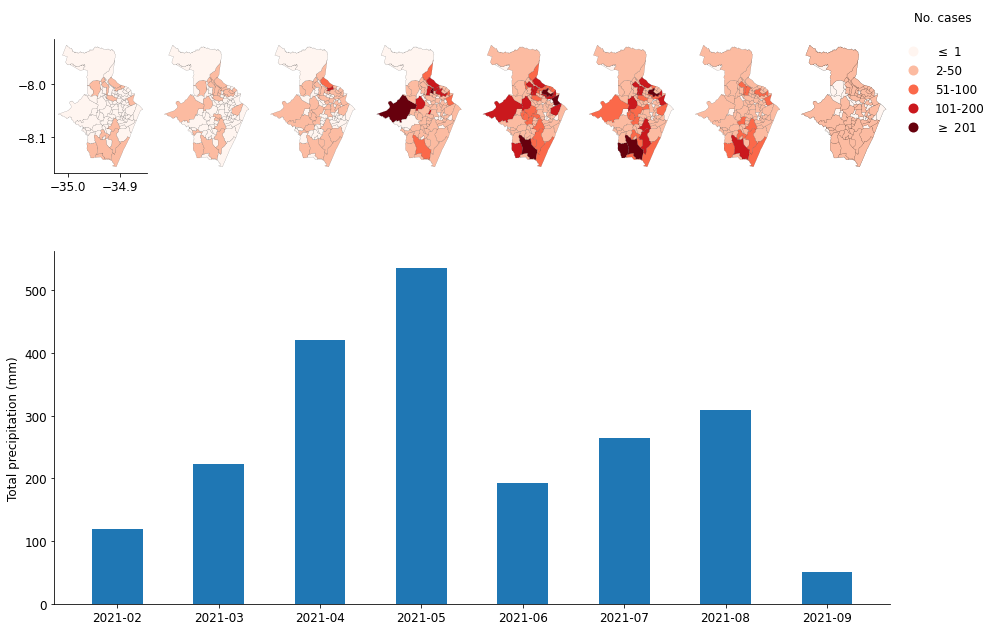

In [60]:
fig3, ax3 = plt.subplots(figsize=(14, 10), ncols=8, nrows=2)
plt.rcParams.update({'font.size': 12})

gridsize=(2,8)

for i, m in enumerate(['02', '03', '04', '05', '06', '07', '08', '09']): #From February to Semptember 2021
  contagem_mensal_bairros(chik_recife, f'2021-{m}', bairros_json).plot(ax=ax3[0][i], 
                                                                        cmap='Reds',
                                                                        column='no_casos',
                                                                       edgecolor='k',
                                                                       linewidth=0.1,
                                                                       scheme='UserDefined',
                                                                       classification_kwds={
                                                                           'bins': res.global_classifier.bins
                                                                       })
  if m == '09':
    contagem_mensal_bairros(chik_recife, f'2021-{m}', bairros_json).plot(ax=ax3[0][i], 
                                                                        cmap='Reds',
                                                                        column='no_casos',
                                                                       edgecolor='k',
                                                                       linewidth=0.1,
                                                                       scheme='UserDefined',
                                                                       classification_kwds={
                                                                           'bins': res.global_classifier.bins
                                                                       },
                                                                       legend=True, #Set legend True and configure
                                                                       legend_kwds=dict(loc='center left', bbox_to_anchor=(1.0, 0.75), title="No. cases\n", frameon=False,
                                                                                        interval=True, fmt="{:.0f}"))
  if i == 0:
    for s in ['top', 'right']:
      ax3[0][i].spines[s].set_visible(False)
  else:
    ax3[0][i].set_axis_off()

#Changing labels from the map
leg = ax3[0][7].get_legend()
for i, l in enumerate(['$\leq\ 1$', '2-50', '51-100', '101-200', '$\geq\ 201$' ]):
  leg.get_texts()[i].set_text(l)

ax3_1 = plt.subplot2grid(gridsize,(1,0), colspan=8, rowspan=1)
ax3_1.bar(x=precipitacao.index[1:], height=precipitacao.iloc[1:]['precipitação total'], width=0.5)

#remove axes spines from the bar plot
for s in ['top', 'right']:
    ax3_1.spines[s].set_visible(False)

ax3_1.set_ylabel("Total precipitation (mm)")


fig3.tight_layout()
fig3.savefig("chikv_recife.jpg", dpi=300)

In [45]:
for i, m in enumerate(['02', '03', '04', '05', '06', '07', '08', '09']):#From February to Semptember 2021
  total = contagem_mensal_bairros(chik_recife,f'2021-{m}', bairros_json)['no_casos'].sum()  
  print(f'In month {m} there was {total} cases')

In month 02 there was 97.0 cases
In month 03 there was 177.0 cases
In month 04 there was 578.0 cases
In month 05 there was 2600.0 cases
In month 06 there was 4537.0 cases
In month 07 there was 4060.0 cases
In month 08 there was 1982.0 cases
In month 09 there was 739.0 cases


In [55]:
for i, m in enumerate(['02', '03', '04', '05', '06', '07', '08', '09']):#From February to Semptember 2021
  top_3 = list(contagem_mensal_bairros(chik_recife, f'2021-{m}', bairros_json).sort_values(by=['no_casos'], ascending=False).head(3)['bairro_nome_ca'])
  print(f'Top 3, month {m} {top_3}')

Top 3, month 02 ['IBURA', 'IMBIRIBEIRA', 'AFOGADOS']
Top 3, month 03 ['FUNDAO', 'LINHA DO TIRO', 'DOIS UNIDOS']
Top 3, month 04 ['LINHA DO TIRO', 'DOIS UNIDOS', 'FUNDAO']
Top 3, month 05 ['VARZEA', 'ALTO JOSE BONIFACIO', 'DOIS UNIDOS']
Top 3, month 06 ['IBURA', 'AGUA FRIA', 'CAMPO GRANDE']
Top 3, month 07 ['IBURA', 'AGUA FRIA', 'COHAB']
Top 3, month 08 ['IBURA', 'AFOGADOS', 'IMBIRIBEIRA']
Top 3, month 09 ['AFOGADOS', 'MUSTARDINHA', 'AGUA FRIA']


These are the Administrative Political Regions from the municipality

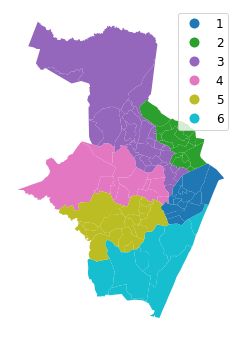

In [56]:
fig4, ax4 = plt.subplots(figsize=(12, 6))

bairros_json.plot(ax=ax4, column='rpa', categorical=True, legend=True)

ax4.set_axis_off()

plt.show()